In [232]:
import csv
import pandas as pd
from pandas import *
from __future__ import division
from pandas.tseries.offsets import *
import dateutil.rrule as dr
import dateutil.parser as dp
import dateutil.relativedelta as drel
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [233]:
pd.options.mode.chained_assignment = None

In [234]:
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11],)
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,6,8,10,11],
#                names=['delinquency','age','3059late','income','90late','6089late','dependents'])
#kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,6,8,10,11],
#               names=['age','3059late','90late','income','6089late','dependents'])
kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,8,10,11],
                names=['delinquency','age','3059late','90late','6089late','dependents'])
kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,8,10,11],
               names=['age','3059late','90late','6089late','dependents'])

In [235]:
kctrain.head(3)

,delinquency,age,3059late,90late,6089late,dependents
0,1,45,2,0,0,2
1,0,40,0,0,0,1
2,0,38,1,1,0,0


In [236]:
kctest.head(3)

,age,3059late,90late,6089late,dependents
0,43,0,0,0,0
1,57,0,0,0,2
2,59,0,0,0,2


In [237]:
kctrain.shape

(150000, 6)

In [238]:
#kctrain = kctrain.dropna(thresh=len(kctrain), axis=1)
kctrain = kctrain.dropna()

In [239]:
#kctest.fillna(0)

In [240]:
kctrain.shape

(146076, 6)

In [241]:
kctrain.isnull().sum()

delinquency    0
age            0
3059late       0
90late         0
6089late       0
dependents     0
dtype: int64

In [242]:
X = kctrain.drop(['delinquency'], 1)
y = kctrain['delinquency']
#X = kctrain.drop('SeriousDlqin2yrs', 1)
#y = kctrain['SeriousDlqin2yrs']

In [243]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [244]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred))

In [245]:
nmax = max(acc_scores, key=acc_scores.get)
nmax
#nmax = 3

20

In [246]:
X_test = X_test.astype(float)
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

In [247]:
X_test = X_test.astype(float)
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

In [248]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.94107254,  0.59142857]),
 array([ 0.99476344,  0.10849057]),
 array([ 0.96717343,  0.1833481 ]),
 array([27308,  1908]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


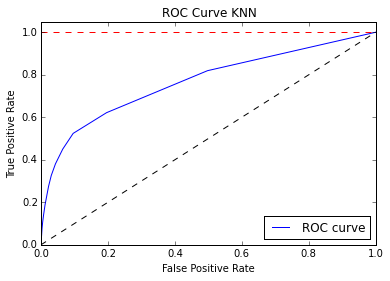

In [249]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

In [250]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.93723346,  0.59285714]),
 array([ 0.9979127 ,  0.04350105]),
 array([ 0.96662174,  0.08105469]),
 array([27308,  1908]))

Populating the interactive namespace from numpy and matplotlib


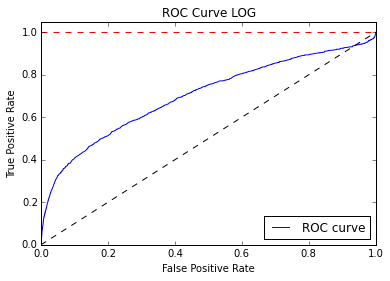

In [251]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

In [252]:
accuracy_score(y_test, y_pred_knn)

0.93688389923329685

In [253]:
accuracy_score(y_test, y_pred_log)

0.93558324205914567

In [254]:
roc_auc_knn

0.76625365540511692

In [255]:
roc_auc_log

0.70098355271137935